# CHAPTER 06 머신러닝, 딥러닝 기초 이론

## 6. 인공 신경망

In [2]:
import numpy as np
import os
import tensorflow as tf

def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

C:\Users\Daeung\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


### 6.5.1 텐서플로우 기본 작동 원리

In [3]:
import tensorflow as tf

W = tf.constant(1)
X = tf.constant(1)
b = tf.constant(1)
y = W * X + b 

print(y)

Tensor("add:0", shape=(), dtype=int32)


In [4]:
sess = tf.Session()
result = sess.run(y)
print('y = ', result)
sess.close()

y =  2


In [5]:
with tf.Session() as sess:
    result = sess.run(y)
    print('y = ', result)


y =  2


Variable 예제

In [27]:
import tensorflow as tf

X = tf.constant(1)
W = tf.Variable(1)
b = tf.Variable(1)
y = W * X + b 

update_op = tf.assign(W, W + 1)

init = tf.global_variables_initializer()
with tf.Session() as sess:
    init.run()
    result = sess.run(y)
    print('y = ', result)    
    sess.run(update_op)    
    result = sess.run(y)
    print('y = ', result)

y =  2
y =  3


placeholder 예제

In [7]:
import tensorflow as tf

X = tf.placeholder(tf.int32, shape = (None))
W = tf.Variable(1)
b = tf.Variable(1)
y = W * X + b 

update_op = tf.assign(W, W + 1)

init = tf.global_variables_initializer()
with tf.Session() as sess:
    init.run()
    result = sess.run(y, feed_dict={X: [1]})
    print('y = ', result)
    
    sess.run(update_op)
    
    result = sess.run(y, feed_dict={X: [1, 2]})
    print('y = ', result)
        

y =  [2]
y =  [3 5]


## 6.5.2 다층 퍼셉트론 구현

**훈련 데이터**

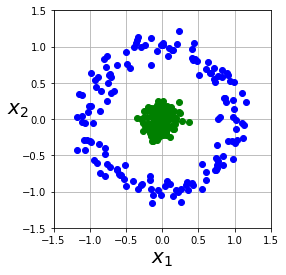

In [8]:
from sklearn.datasets import make_circles, make_moons
X_train, y_train = make_circles(n_samples=300, factor=0.1, noise=0.1,random_state=0)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bo")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "go")
    plt.axis(axes)
    plt.gca().set_aspect('equal')
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X_train, y_train, [-1.5, 1.5, -1.5, 1.5])
plt.show()

**Construction Phase**

In [29]:
reset_graph()

n_inputs = 2
n_hidden = 3
n_outputs =2

learning_rate = 0.1

X = tf.placeholder(tf.float32, shape=(None, n_inputs))
y = tf.placeholder(tf.int32, shape=(None))
y_one_hot = tf.one_hot(y, depth=2)

W1 = tf.Variable(tf.random_uniform((n_inputs, n_hidden),-1.0, 1.0, seed=0))
b1 = tf.Variable(tf.zeros([n_hidden]))

W2 = tf.Variable(tf.random_uniform((n_hidden, n_outputs),-1.0, 1.0, seed=0))
b2 = tf.Variable(tf.zeros([n_outputs]))

Z = tf.nn.sigmoid(tf.add(tf.matmul(X, W1), b1))
logits = tf.add(tf.matmul(Z, W2), b2)


pred = tf.argmax(logits, axis=1)

xentropy = tf.nn.sigmoid_cross_entropy_with_logits(labels=y_one_hot, logits=logits)
loss = tf.reduce_mean(xentropy)

In [30]:
grad_W1, grad_W2, grad_b1, grad_b2 = tf.gradients(loss, [W1, W2, b1, b2])

update_W1 = W1.assign(W1 - learning_rate * grad_W1)
update_W2 = W2.assign(W2 - learning_rate * grad_W2)
update_b1 = b1.assign(b1 - learning_rate * grad_b1)
update_b2 = b2.assign(b2 - learning_rate * grad_b2)

**Execution Phase**

In [31]:
init = tf.global_variables_initializer()

n_epochs = 10001
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(n_epochs):
        sess.run([loss, update_W1, update_W2, update_b1, update_b2], feed_dict={X: X_train, y: y_train})
       
        if epoch % 1000 == 0: 
            print("Epoch", epoch, "loss =", loss.eval(feed_dict={X: X_train, y: y_train}))


Epoch 0 loss = 0.72017175
Epoch 1000 loss = 0.6933112
Epoch 2000 loss = 0.69315946
Epoch 3000 loss = 0.6930083
Epoch 4000 loss = 0.6927504
Epoch 5000 loss = 0.69210577
Epoch 6000 loss = 0.6898323
Epoch 7000 loss = 0.67914486
Epoch 8000 loss = 0.6438312
Epoch 9000 loss = 0.59557265
Epoch 10000 loss = 0.5180364


**옵티마이저 사용**

In [14]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate = learning_rate)
training_op = optimizer.minimize(loss)

init = tf.global_variables_initializer()

n_epochs = 10001
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(n_epochs):
        sess.run(training_op, feed_dict={X: X_train, y: y_train})
       
        if epoch % 1000 == 0: 
            print("Epoch", epoch, "loss =", loss.eval(feed_dict={X: X_train, y: y_train}))

Epoch 0 loss = 0.7145189
Epoch 1000 loss = 0.6802356
Epoch 2000 loss = 0.6248913
Epoch 3000 loss = 0.4921999
Epoch 4000 loss = 0.3402831
Epoch 5000 loss = 0.233697
Epoch 6000 loss = 0.17054303
Epoch 7000 loss = 0.13165027
Epoch 8000 loss = 0.106082276
Epoch 9000 loss = 0.088289626
Epoch 10000 loss = 0.075322695


**Adam 옵티마이저 사용**

In [32]:
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate)
training_op = optimizer.minimize(loss)

init = tf.global_variables_initializer()

n_epochs = 10001
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(n_epochs):
        sess.run(training_op, feed_dict={X: X_train, y: y_train})
       
        if epoch % 1000 == 0: 
            print("Epoch", epoch, "loss =", loss.eval(feed_dict={X: X_train, y: y_train}))

Epoch 0 loss = 0.69912046
Epoch 1000 loss = 0.0019900107
Epoch 2000 loss = 0.00058186037
Epoch 3000 loss = 0.0002568544
Epoch 4000 loss = 0.00013199069
Epoch 5000 loss = 7.294129e-05
Epoch 6000 loss = 4.1904088e-05
Epoch 7000 loss = 2.4606905e-05
Epoch 8000 loss = 1.4635965e-05
Epoch 9000 loss = 8.7722765e-06
Epoch 10000 loss = 5.2821324e-06


**미니 배치 경사 하강법**

In [16]:
n_samples = len(X_train)
def fetch_batch(batch_size, epoch, iteration):
    np.random.seed(epoch)
    shuffled_indices = np.random.permutation(n_samples)
    batch_indices = shuffled_indices[iteration * batch_size:(iteration+1)*batch_size]
    return X_train[batch_indices, :], y_train[batch_indices]

In [17]:
n_epochs = 1001
batch_size = 32
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(n_epochs):
        for iteration in range(n_samples // batch_size):
            X_batch, y_batch = fetch_batch(batch_size, epoch, iteration)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
       
        if epoch % 100 == 0: 
            print("Epoch", epoch, "loss =", loss.eval(feed_dict={X: X_batch, y: y_batch}))

Epoch 0 loss = 0.6641128
Epoch 100 loss = 0.009338792
Epoch 200 loss = 0.0024723364
Epoch 300 loss = 0.0008674047
Epoch 400 loss = 0.0004912802
Epoch 500 loss = 0.00030047988
Epoch 600 loss = 0.00015475071
Epoch 700 loss = 0.000117552205
Epoch 800 loss = 9.379999e-05
Epoch 900 loss = 2.8114755e-05
Epoch 1000 loss = 3.2007174e-05


**텐서보드를 이용한 시각화**

In [18]:
root_logdir = 'logs'                               #추가된 부분
logdir = '{}/log-{}'.format(root_logdir, 'GD')     #추가된 부분

reset_graph()

n_inputs = 2
n_hidden = 3
n_outputs =2
learning_rate = 0.1

X = tf.placeholder(tf.float32, shape=(None, n_inputs))
y = tf.placeholder(tf.int32, shape=(None))
y_one_hot = tf.one_hot(y, depth=2)

W1 = tf.Variable(tf.random_uniform((n_inputs, n_hidden),-1.0, 1.0, seed=0))
b1 = tf.Variable(tf.zeros([n_hidden]))

W2 = tf.Variable(tf.random_uniform((n_hidden, n_outputs),-1.0, 1.0, seed=0))
b2 = tf.Variable(tf.zeros([n_outputs]))

Z = tf.nn.sigmoid(tf.add(tf.matmul(X, W1), b1))
logits = tf.add(tf.matmul(Z, W2), b2)


pred = tf.argmax(logits, axis=1)

xentropy = tf.nn.sigmoid_cross_entropy_with_logits(labels=y_one_hot, logits=logits)
loss = tf.reduce_mean(xentropy)

optimizer = tf.train.GradientDescentOptimizer(learning_rate = learning_rate)
training_op = optimizer.minimize(loss)

loss_summary = tf.summary.scalar('loss', loss)                           #추가된 부분
file_writer = tf.summary.FileWriter(logdir, tf.get_default_graph())      #추가된 부분

init = tf.global_variables_initializer()

n_samples = len(X_train)
def fetch_batch(batch_size, epoch, iteration):
    np.random.seed(epoch)
    shuffled_indices = np.random.permutation(n_samples)
    batch_indices = shuffled_indices[iteration * batch_size:(iteration+1)*batch_size]
    return X_train[batch_indices, :], y_train[batch_indices]

n_epochs = 3001
batch_size = 32
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(n_epochs):
        for iteration in range(n_samples // batch_size):
            X_batch, y_batch = fetch_batch(batch_size, epoch, iteration)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
             
        if epoch % 100 == 0: 
            print("Epoch", epoch, "loss =", loss.eval(feed_dict={X: X_batch, y: y_batch}))
            summary_str = sess.run(loss_summary, feed_dict={X: X_batch, y: y_batch})         #추가된 부분
            file_writer.add_summary(summary_str, epoch)                                      #추가된 부분
file_writer.close()                                                                          #추가된 부분


Epoch 0 loss = 0.70815223
Epoch 100 loss = 0.69300175
Epoch 200 loss = 0.6922803
Epoch 300 loss = 0.69030285
Epoch 400 loss = 0.6909466
Epoch 500 loss = 0.6944545
Epoch 600 loss = 0.6923089
Epoch 700 loss = 0.6729763
Epoch 800 loss = 0.69765
Epoch 900 loss = 0.6208962
Epoch 1000 loss = 0.6324753
Epoch 1100 loss = 0.5516732
Epoch 1200 loss = 0.41701415
Epoch 1300 loss = 0.30659318
Epoch 1400 loss = 0.37154552
Epoch 1500 loss = 0.2534955
Epoch 1600 loss = 0.27752328
Epoch 1700 loss = 0.19012852
Epoch 1800 loss = 0.24420223
Epoch 1900 loss = 0.107086375
Epoch 2000 loss = 0.07938772
Epoch 2100 loss = 0.06329066
Epoch 2200 loss = 0.05630389
Epoch 2300 loss = 0.04539364
Epoch 2400 loss = 0.033207253
Epoch 2500 loss = 0.048703894
Epoch 2600 loss = 0.03103451
Epoch 2700 loss = 0.024141196
Epoch 2800 loss = 0.024843259
Epoch 2900 loss = 0.02160205
Epoch 3000 loss = 0.0256204


In [21]:
root_logdir = 'logs'                                 
logdir = '{}/log-{}'.format(root_logdir, 'Adam')     #변경된 부분

reset_graph()

n_inputs = 2
n_hidden = 3
n_outputs =2
learning_rate = 0.1

X = tf.placeholder(tf.float32, shape=(None, n_inputs))
y = tf.placeholder(tf.int32, shape=(None))
y_one_hot = tf.one_hot(y, depth=2)

W1 = tf.Variable(tf.random_uniform((n_inputs, n_hidden),-1.0, 1.0, seed=0))
b1 = tf.Variable(tf.zeros([n_hidden]))

W2 = tf.Variable(tf.random_uniform((n_hidden, n_outputs),-1.0, 1.0, seed=0))
b2 = tf.Variable(tf.zeros([n_outputs]))

Z = tf.nn.sigmoid(tf.add(tf.matmul(X, W1), b1))
logits = tf.add(tf.matmul(Z, W2), b2)


pred = tf.argmax(logits, axis=1)

xentropy = tf.nn.sigmoid_cross_entropy_with_logits(labels=y_one_hot, logits=logits)
loss = tf.reduce_mean(xentropy)

optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate)        #변경된 부분
training_op = optimizer.minimize(loss)

loss_summary = tf.summary.scalar('loss', loss)                           
file_writer = tf.summary.FileWriter(logdir, tf.get_default_graph())      

init = tf.global_variables_initializer()

n_samples = len(X_train)
def fetch_batch(batch_size, epoch, iteration):
    np.random.seed(epoch)
    shuffled_indices = np.random.permutation(n_samples)
    batch_indices = shuffled_indices[iteration * batch_size:(iteration+1)*batch_size]
    return X_train[batch_indices, :], y_train[batch_indices]

n_epochs = 3001
batch_size = 32
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(n_epochs):
        for iteration in range(n_samples // batch_size):
            X_batch, y_batch = fetch_batch(batch_size, epoch, iteration)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
             
        if epoch % 100 == 0: 
            print("Epoch", epoch, "loss =", loss.eval(feed_dict={X: X_batch, y: y_batch}))
            summary_str = sess.run(loss_summary, feed_dict={X: X_batch, y: y_batch})         
            file_writer.add_summary(summary_str, epoch)                                      
file_writer.close()                                                                         


Epoch 0 loss = 0.7022952
Epoch 100 loss = 0.0025116662
Epoch 200 loss = 0.0011059927
Epoch 300 loss = 0.00030567474
Epoch 400 loss = 0.00018620233
Epoch 500 loss = 0.00011306527
Epoch 600 loss = 5.903248e-05
Epoch 700 loss = 4.3682518e-05
Epoch 800 loss = 4.2403124e-05
Epoch 900 loss = 1.7947783e-05
Epoch 1000 loss = 8.829158e-06
Epoch 1100 loss = 5.647135e-06
Epoch 1200 loss = 3.525286e-06
Epoch 1300 loss = 2.2136937e-06
Epoch 1400 loss = 1.7427665e-06
Epoch 1500 loss = 1.0049032e-06
Epoch 1600 loss = 5.978127e-07
Epoch 1700 loss = 3.9548038e-07
Epoch 1800 loss = 2.975557e-07
Epoch 1900 loss = 2.0363247e-07
Epoch 2000 loss = 1.06249075e-07
Epoch 2100 loss = 7.621058e-08
Epoch 2200 loss = 4.994253e-08
Epoch 2300 loss = 2.9217485e-08
Epoch 2400 loss = 1.9870399e-08
Epoch 2500 loss = 1.2196108e-08
Epoch 2600 loss = 7.450662e-09
Epoch 2700 loss = 5.633889e-09
Epoch 2800 loss = 3.477316e-09
Epoch 2900 loss = 2.2393734e-09
Epoch 3000 loss = 2.0610667e-09


### 텐서보드 실행

터미널을 열고 현재의 디렉토리로 이동 후,  <br>
텐서보드를 다음과 같이 실행한다. <br>

$ tensorboard --logdir = ./logs


### 그래프 정리

In [20]:
root_logdir = 'logs'
logdir = '{}/log-{}'.format(root_logdir, 'Adam')

reset_graph()

n_inputs = 2
n_hidden = 3
n_outputs =2
learning_rate = 0.1

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")

with tf.name_scope("label") as scope:
    y = tf.placeholder(tf.int32, shape=(None), name="y")
    y_one_hot = tf.one_hot(y, depth=2, name="y_one_hot")

W1 = tf.Variable(tf.random_uniform((n_inputs, n_hidden),-1.0, 1.0, seed=0), name="W1")
b1 = tf.Variable(tf.zeros([n_hidden]), name="b1")

W2 = tf.Variable(tf.random_uniform((n_hidden, n_outputs),-1.0, 1.0, seed=0), name="W2")
b2 = tf.Variable(tf.zeros([n_outputs]), name="b2")

Z = tf.nn.sigmoid(tf.add(tf.matmul(X, W1), b1))
logits = tf.add(tf.matmul(Z, W2), b2)


pred = tf.argmax(logits, axis=1)

with tf.name_scope("loss") as scope:
    xentropy = tf.nn.sigmoid_cross_entropy_with_logits(labels=y_one_hot, logits=logits)
    loss = tf.reduce_mean(xentropy)

optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate)
training_op = optimizer.minimize(loss)

loss_summary = tf.summary.scalar('loss', loss)
file_writer = tf.summary.FileWriter(logdir, tf.get_default_graph())


init = tf.global_variables_initializer()

n_samples = len(X_train)
def fetch_batch(batch_size, epoch, iteration):
    np.random.seed(epoch)
    shuffled_indices = np.random.permutation(n_samples)
    batch_indices = shuffled_indices[iteration * batch_size:(iteration+1)*batch_size]
    return X_train[batch_indices, :], y_train[batch_indices]

n_epochs = 3001
batch_size = 32
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(n_epochs):
        for iteration in range(n_samples // batch_size):
            X_batch, y_batch = fetch_batch(batch_size, epoch, iteration)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
             
        if epoch % 100 == 0: 
            print("Epoch", epoch, "loss =", loss.eval(feed_dict={X: X_batch, y: y_batch}))
            summary_str = sess.run(loss_summary, feed_dict={X: X_batch, y: y_batch})
            file_writer.add_summary(summary_str, epoch)
file_writer.close()

Epoch 0 loss = 0.7022952
Epoch 100 loss = 0.0025116662
Epoch 200 loss = 0.0011059927
Epoch 300 loss = 0.00030567474
Epoch 400 loss = 0.00018620233
Epoch 500 loss = 0.00011306527
Epoch 600 loss = 5.903248e-05
Epoch 700 loss = 4.3682518e-05
Epoch 800 loss = 4.2403124e-05
Epoch 900 loss = 1.7947783e-05
Epoch 1000 loss = 8.829158e-06
Epoch 1100 loss = 5.647135e-06
Epoch 1200 loss = 3.525286e-06
Epoch 1300 loss = 2.2136937e-06
Epoch 1400 loss = 1.7427665e-06
Epoch 1500 loss = 1.0049032e-06
Epoch 1600 loss = 5.978127e-07
Epoch 1700 loss = 3.9548038e-07
Epoch 1800 loss = 2.975557e-07
Epoch 1900 loss = 2.0363247e-07
Epoch 2000 loss = 1.06249075e-07
Epoch 2100 loss = 7.621058e-08
Epoch 2200 loss = 4.994253e-08
Epoch 2300 loss = 2.9217485e-08
Epoch 2400 loss = 1.9870399e-08
Epoch 2500 loss = 1.2196108e-08
Epoch 2600 loss = 7.450662e-09
Epoch 2700 loss = 5.633889e-09
Epoch 2800 loss = 3.477316e-09
Epoch 2900 loss = 2.2393734e-09
Epoch 3000 loss = 2.0610667e-09


### 모델의 저장과 복원

In [35]:
root_logdir = 'logs'
logdir = '{}/log-{}'.format(root_logdir, 'Adam')

reset_graph()

n_inputs = 2
n_hidden = 3
n_outputs =2
learning_rate = 0.1

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")

with tf.name_scope("label") as scope:
    y = tf.placeholder(tf.int32, shape=(None), name="y")
    y_one_hot = tf.one_hot(y, depth=2, name="y_one_hot")

W1 = tf.Variable(tf.random_uniform((n_inputs, n_hidden),-1.0, 1.0, seed=0), name="W1")
b1 = tf.Variable(tf.zeros([n_hidden]), name="b1")

W2 = tf.Variable(tf.random_uniform((n_hidden, n_outputs),-1.0, 1.0, seed=0), name="W2")
b2 = tf.Variable(tf.zeros([n_outputs]), name="b2")

Z = tf.nn.sigmoid(tf.add(tf.matmul(X, W1), b1))
logits = tf.add(tf.matmul(Z, W2), b2)


pred = tf.argmax(logits, axis=1)

with tf.name_scope("loss") as scope:
    xentropy = tf.nn.sigmoid_cross_entropy_with_logits(labels=y_one_hot, logits=logits)
    loss = tf.reduce_mean(xentropy)

optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate)
training_op = optimizer.minimize(loss)

loss_summary = tf.summary.scalar('loss', loss)
file_writer = tf.summary.FileWriter(logdir, tf.get_default_graph())

saver = tf.train.Saver()                            #추가된 부분

init = tf.global_variables_initializer()

n_samples = len(X_train)
def fetch_batch(batch_size, epoch, iteration):
    np.random.seed(epoch)
    shuffled_indices = np.random.permutation(n_samples)
    batch_indices = shuffled_indices[iteration * batch_size:(iteration+1)*batch_size]
    return X_train[batch_indices, :], y_train[batch_indices]

n_epochs = 3001
batch_size = 32
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(n_epochs):
        for iteration in range(n_samples // batch_size):
            X_batch, y_batch = fetch_batch(batch_size, epoch, iteration)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
             
        if epoch % 100 == 0: 
            print("Epoch", epoch, "loss =", loss.eval(feed_dict={X: X_batch, y: y_batch}))
            summary_str = sess.run(loss_summary, feed_dict={X: X_batch, y: y_batch})
            file_writer.add_summary(summary_str, epoch)
    
    save_path = saver.save(sess, "./models/model_final.ckpt")
file_writer.close()

Epoch 0 loss = 0.7022952
Epoch 100 loss = 0.0025116662
Epoch 200 loss = 0.0011059927
Epoch 300 loss = 0.00030567474
Epoch 400 loss = 0.00018620233
Epoch 500 loss = 0.00011306527
Epoch 600 loss = 5.903248e-05
Epoch 700 loss = 4.3682518e-05
Epoch 800 loss = 4.2403124e-05
Epoch 900 loss = 1.7947783e-05
Epoch 1000 loss = 8.829158e-06
Epoch 1100 loss = 5.647135e-06
Epoch 1200 loss = 3.525286e-06
Epoch 1300 loss = 2.2136937e-06
Epoch 1400 loss = 1.7427665e-06
Epoch 1500 loss = 1.0049032e-06
Epoch 1600 loss = 5.978127e-07
Epoch 1700 loss = 3.9548038e-07
Epoch 1800 loss = 2.975557e-07
Epoch 1900 loss = 2.0363247e-07
Epoch 2000 loss = 1.06249075e-07
Epoch 2100 loss = 7.621058e-08
Epoch 2200 loss = 4.994253e-08
Epoch 2300 loss = 2.9217485e-08
Epoch 2400 loss = 1.9870399e-08
Epoch 2500 loss = 1.2196108e-08
Epoch 2600 loss = 7.450662e-09
Epoch 2700 loss = 5.633889e-09
Epoch 2800 loss = 3.477316e-09
Epoch 2900 loss = 2.2393734e-09
Epoch 3000 loss = 2.0610667e-09


INFO:tensorflow:Restoring parameters from ./models/model_final.ckpt


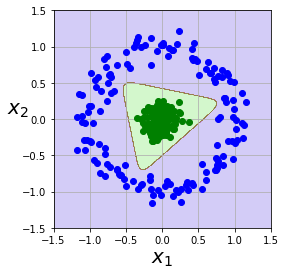

In [36]:
with tf.Session() as sess:
    saver.restore(sess, "./models/model_final.ckpt")
    x0s = np.linspace(-1.5, 1.5, 1000)
    x1s = np.linspace(-1.5, 1.5, 1000)
    x0, x1 = np.meshgrid(x0s, x1s)
    X_new = np.c_[x0.ravel(), x1.ravel()] 
    y_pred = sess.run(pred, feed_dict={X: X_new})

plot_dataset(X_train, y_train, [-1.5, 1.5, -1.5, 1.5])
plt.contourf(x0, x1, y_pred.reshape(1000,1000), cmap=plt.cm.brg, alpha=0.2)  


In [37]:
root_logdir = 'logs'
logdir = '{}/log-{}'.format(root_logdir, 'Adam')

reset_graph()

n_inputs = 2
n_hidden = 2                                     #은닉층의 뉴런의수가 2개일 경우
n_outputs =2
learning_rate = 0.1

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")

with tf.name_scope("label") as scope:
    y = tf.placeholder(tf.int32, shape=(None), name="y")
    y_one_hot = tf.one_hot(y, depth=2, name="y_one_hot")

W1 = tf.Variable(tf.random_uniform((n_inputs, n_hidden),-1.0, 1.0, seed=0), name="W1")
b1 = tf.Variable(tf.zeros([n_hidden]), name="b1")

W2 = tf.Variable(tf.random_uniform((n_hidden, n_outputs),-1.0, 1.0, seed=0), name="W2")
b2 = tf.Variable(tf.zeros([n_outputs]), name="b2")

Z = tf.nn.sigmoid(tf.add(tf.matmul(X, W1), b1))
logits = tf.add(tf.matmul(Z, W2), b2)


pred = tf.argmax(logits, axis=1)

with tf.name_scope("loss") as scope:
    xentropy = tf.nn.sigmoid_cross_entropy_with_logits(labels=y_one_hot, logits=logits)
    loss = tf.reduce_mean(xentropy)

optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate)
training_op = optimizer.minimize(loss)

loss_summary = tf.summary.scalar('loss', loss)
file_writer = tf.summary.FileWriter(logdir, tf.get_default_graph())

saver = tf.train.Saver()                           

init = tf.global_variables_initializer()

n_samples = len(X_train)
def fetch_batch(batch_size, epoch, iteration):
    np.random.seed(epoch)
    shuffled_indices = np.random.permutation(n_samples)
    batch_indices = shuffled_indices[iteration * batch_size:(iteration+1)*batch_size]
    return X_train[batch_indices, :], y_train[batch_indices]

n_epochs = 3001
batch_size = 32
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(n_epochs):
        for iteration in range(n_samples // batch_size):
            X_batch, y_batch = fetch_batch(batch_size, epoch, iteration)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
             
        if epoch % 100 == 0: 
            print("Epoch", epoch, "loss =", loss.eval(feed_dict={X: X_batch, y: y_batch}))
            summary_str = sess.run(loss_summary, feed_dict={X: X_batch, y: y_batch})
            file_writer.add_summary(summary_str, epoch)
    
    save_path = saver.save(sess, "./models/model_final.ckpt")
file_writer.close()

Epoch 0 loss = 0.6948612
Epoch 100 loss = 0.089908406
Epoch 200 loss = 0.19593967
Epoch 300 loss = 0.24837051
Epoch 400 loss = 0.24957927
Epoch 500 loss = 0.28432783
Epoch 600 loss = 0.15955958
Epoch 700 loss = 0.2446151
Epoch 800 loss = 0.28649676
Epoch 900 loss = 0.21525699
Epoch 1000 loss = 0.46675965
Epoch 1100 loss = 0.26032066
Epoch 1200 loss = 0.26941293
Epoch 1300 loss = 0.1799398
Epoch 1400 loss = 0.2934072
Epoch 1500 loss = 0.1500995
Epoch 1600 loss = 0.22122866
Epoch 1700 loss = 0.16907921
Epoch 1800 loss = 0.3899669
Epoch 1900 loss = 0.19330847
Epoch 2000 loss = 0.09975595
Epoch 2100 loss = 0.12548839
Epoch 2200 loss = 0.18803675
Epoch 2300 loss = 0.26335806
Epoch 2400 loss = 0.08654228
Epoch 2500 loss = 0.3451331
Epoch 2600 loss = 0.17335945
Epoch 2700 loss = 0.06699464
Epoch 2800 loss = 0.43722722
Epoch 2900 loss = 0.22527122
Epoch 3000 loss = 0.312746


INFO:tensorflow:Restoring parameters from ./models/model_final.ckpt


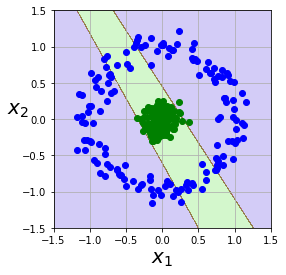

In [38]:
with tf.Session() as sess:
    saver.restore(sess, "./models/model_final.ckpt")
    x0s = np.linspace(-1.5, 1.5, 1000)
    x1s = np.linspace(-1.5, 1.5, 1000)
    x0, x1 = np.meshgrid(x0s, x1s)
    X_new = np.c_[x0.ravel(), x1.ravel()] 
    y_pred = sess.run(pred, feed_dict={X: X_new})

plot_dataset(X_train, y_train, [-1.5, 1.5, -1.5, 1.5])
plt.contourf(x0, x1, y_pred.reshape(1000,1000), cmap=plt.cm.brg, alpha=0.2)  


### 은닉층의 수

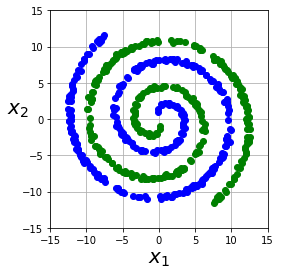

In [40]:
#나선 데이터 
def twospirals(n_points, noise=.5):
    """
     Returns the two spirals dataset.
    """
    np.random.seed(10)
    n = np.sqrt(np.random.rand(n_points,1)) * 780 * (2*np.pi)/360
    d1x = -np.cos(n)*n + np.random.rand(n_points,1) * noise
    d1y = np.sin(n)*n + np.random.rand(n_points,1) * noise
    return (np.vstack((np.hstack((d1x,d1y)),np.hstack((-d1x,-d1y)))), 
            np.hstack((np.zeros(n_points),np.ones(n_points))))

X_train, y_train = twospirals(300)
plot_dataset(X_train, y_train, [-15, 15, -15, 15])
plt.show()

하나의 은닉층을 사용할 경우

In [41]:
root_logdir = 'logs'
logdir = '{}/log-{}'.format(root_logdir, 'Adam')

reset_graph()

n_inputs = 2
n_hidden = 32
n_outputs =2
learning_rate = 0.01


X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")

with tf.name_scope("label") as scope:
    y = tf.placeholder(tf.int32, shape=(None), name="y")
    y_one_hot = tf.one_hot(y, depth=2, name="y_one_hot")

W1 = tf.Variable(tf.random_uniform((n_inputs, n_hidden),-1.0, 1.0, seed=0), name="W1")
b1 = tf.Variable(tf.zeros([n_hidden]), name="b1")

W2 = tf.Variable(tf.random_uniform((n_hidden, n_outputs),-1.0, 1.0, seed=0), name="W2")
b2 = tf.Variable(tf.zeros([n_outputs]), name="b2")

Z = tf.nn.relu(tf.add(tf.matmul(X, W1), b1))
logits = tf.add(tf.matmul(Z, W2), b2)

pred = tf.argmax(logits, axis=1)

with tf.name_scope("loss") as scope:
    xentropy = tf.nn.sigmoid_cross_entropy_with_logits(labels=y_one_hot, logits=logits)
    loss = tf.reduce_mean(xentropy)

optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate)
training_op = optimizer.minimize(loss)

correct = tf.nn.in_top_k(logits, y, 1)
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))


loss_summary = tf.summary.scalar('loss', loss)
file_writer = tf.summary.FileWriter(logdir, tf.get_default_graph())

init = tf.global_variables_initializer()
saver = tf.train.Saver(max_to_keep=5)

n_samples = len(X_train)
def fetch_batch(batch_size, epoch, iteration):
    np.random.seed(epoch)
    shuffled_indices = np.random.permutation(n_samples)
    batch_indices = shuffled_indices[iteration * batch_size:(iteration+1)*batch_size]
    return X_train[batch_indices, :], y_train[batch_indices]

n_epochs = 3001
batch_size = 32
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(n_epochs):
        for iteration in range(n_samples // batch_size):
            X_batch, y_batch = fetch_batch(batch_size, epoch, iteration)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
             
        if epoch % 100 == 0: 
            acc = accuracy.eval(feed_dict={X: X_train, y: y_train})
            print("Epoch", epoch, "accuracy =", acc)
            if acc == 1.0:
                save_path = saver.save(sess, "./models/model_final.ckpt")
                break                
            
            summary_str = sess.run(loss_summary, feed_dict={X: X_batch, y: y_batch})
            file_writer.add_summary(summary_str, epoch)
        
    save_path = saver.save(sess, "./models/model_final.ckpt")
file_writer.close()

Epoch 0 accuracy = 0.50166667
Epoch 100 accuracy = 0.56666666
Epoch 200 accuracy = 0.5733333
Epoch 300 accuracy = 0.70166665
Epoch 400 accuracy = 0.6616667
Epoch 500 accuracy = 0.755
Epoch 600 accuracy = 0.83666664
Epoch 700 accuracy = 0.925
Epoch 800 accuracy = 0.975
Epoch 900 accuracy = 0.9683333
Epoch 1000 accuracy = 0.99666667
Epoch 1100 accuracy = 0.905
Epoch 1200 accuracy = 1.0


INFO:tensorflow:Restoring parameters from ./models/model_final.ckpt


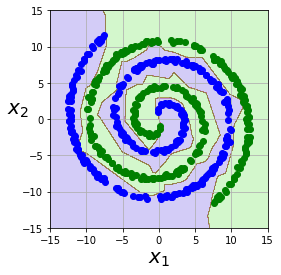

In [43]:
with tf.Session() as sess:
    saver.restore(sess, "./models/model_final.ckpt")
    x0s = np.linspace(-15, 15, 1000)
    x1s = np.linspace(-15, 15, 1000)
    x0, x1 = np.meshgrid(x0s, x1s)
    X_new = np.c_[x0.ravel(), x1.ravel()] 
    y_pred = sess.run(pred, feed_dict={X: X_new})

plot_dataset(X_train, y_train, [-15, 15, -15, 15])
plt.contourf(x0, x1, y_pred.reshape(1000,1000), cmap=plt.cm.brg, alpha=0.2)  


두개의 은닉층을 사용할 경우

In [44]:
root_logdir = 'logs'
logdir = '{}/log-{}'.format(root_logdir, 'Adam')

reset_graph()

n_inputs = 2
n_hidden1 = 7
n_hidden2 = 6
n_outputs =2

learning_rate = 0.01

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")

with tf.name_scope("label") as scope:
    y = tf.placeholder(tf.int32, shape=(None), name="y")
    y_one_hot = tf.one_hot(y, depth=2, name="y_one_hot")

W1 = tf.Variable(tf.random_uniform((n_inputs, n_hidden1),-1.0, 1.0, seed=0), name="W1")
b1 = tf.Variable(tf.zeros([n_hidden1]), name="b1")

W2 = tf.Variable(tf.random_uniform((n_hidden1, n_hidden2),-1.0, 1.0, seed=0), name="W2")
b2 = tf.Variable(tf.zeros([n_hidden2]), name="b2")

W3 = tf.Variable(tf.random_uniform((n_hidden2, n_outputs),-1.0, 1.0, seed=0), name="W3")
b3 = tf.Variable(tf.zeros([n_outputs]), name="b3")

Z1 = tf.nn.sigmoid(tf.add(tf.matmul(X, W1), b1))
Z2 = tf.nn.sigmoid(tf.add(tf.matmul(Z1, W2), b2))
logits = tf.add(tf.matmul(Z2, W3), b3)

pred = tf.argmax(logits, axis=1)

with tf.name_scope("loss") as scope:
    xentropy = tf.nn.sigmoid_cross_entropy_with_logits(labels=y_one_hot, logits=logits)
    loss = tf.reduce_mean(xentropy)

optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate)
training_op = optimizer.minimize(loss)

correct = tf.nn.in_top_k(logits, y, 1)
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))


loss_summary = tf.summary.scalar('loss', loss)
file_writer = tf.summary.FileWriter(logdir, tf.get_default_graph())

init = tf.global_variables_initializer()
saver = tf.train.Saver(max_to_keep=5)

n_samples = len(X_train)
def fetch_batch(batch_size, epoch, iteration):
    np.random.seed(epoch)
    shuffled_indices = np.random.permutation(n_samples)
    batch_indices = shuffled_indices[iteration * batch_size:(iteration+1)*batch_size]
    return X_train[batch_indices, :], y_train[batch_indices]

n_epochs = 3001
batch_size = 32
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(n_epochs):
        for iteration in range(n_samples // batch_size):
            X_batch, y_batch = fetch_batch(batch_size, epoch, iteration)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
             
        if epoch % 100 == 0: 
            acc = accuracy.eval(feed_dict={X: X_train, y: y_train})
            print("Epoch", epoch, "accuracy =", acc)
            if acc == 1.0:
                save_path = saver.save(sess, "./models/model_final.ckpt")
                break
        
    save_path = saver.save(sess, "./models/model_final.ckpt")
file_writer.close()

Epoch 0 accuracy = 0.485
Epoch 100 accuracy = 0.6166667
Epoch 200 accuracy = 0.5783333
Epoch 300 accuracy = 0.62
Epoch 400 accuracy = 0.68333334
Epoch 500 accuracy = 0.785
Epoch 600 accuracy = 0.815
Epoch 700 accuracy = 0.865
Epoch 800 accuracy = 0.895
Epoch 900 accuracy = 0.89166665
Epoch 1000 accuracy = 0.9683333
Epoch 1100 accuracy = 0.99666667
Epoch 1200 accuracy = 1.0


INFO:tensorflow:Restoring parameters from ./models/model_final.ckpt


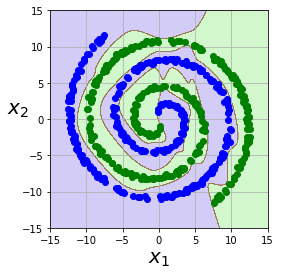

In [45]:
with tf.Session() as sess:
    saver.restore(sess, "./models/model_final.ckpt")
    x0s = np.linspace(-15, 15, 1000)
    x1s = np.linspace(-15, 15, 1000)
    x0, x1 = np.meshgrid(x0s, x1s)
    X_new = np.c_[x0.ravel(), x1.ravel()] 
    y_pred = sess.run(pred, feed_dict={X: X_new})

plot_dataset(X_train, y_train, [-15, 15, -15, 15])
plt.contourf(x0, x1, y_pred.reshape(1000,1000), cmap=plt.cm.brg, alpha=0.2)  
